In [2]:
import pandas as pd
import numpy as np
import os
# load data and prepare for modeling
feature_cols = ["revenue","outcalls", "incalls", "months", "eqpdays", "webcap", "marryyes","travel","pcown","creticd","retcalls", "churndep"]
cwd = os.getcwd()
data = pd.read_csv(cwd + '/cell2cell_data.csv', names = feature_cols)
print(data.index)
data[:5]

RangeIndex(start=0, stop=39859, step=1)


,revenue,outcalls,incalls,months,eqpdays,webcap,marryyes,travel,pcown,creticd,retcalls,churndep
0,48.82,10.00,3.0,26,780,0,0,0,0,1,4,1
1,83.53,20.00,1.0,31,745,1,0,0,0,0,4,1
2,29.99,0.00,0.0,52,1441,0,0,0,1,1,3,1
3,51.42,0.00,0.0,36,59,1,0,0,0,0,4,1
4,37.75,2.67,0.0,25,572,0,0,0,1,1,3,1


In [3]:
train_df = data.sample(frac=0.8)
print(train_df.index)
train_df[:5]

Int64Index([ 2331,  6272, 36798, 35010, 27645, 23759, 27427,  8474, 26537,
             1632,
            ...
             8782, 22534, 28645, 15748,  2035,  3999,  8230, 22193, 37291,
            15504],
           dtype='int64', length=31887)


,revenue,outcalls,incalls,months,eqpdays,webcap,marryyes,travel,pcown,creticd,retcalls,churndep
2331,72.75,0.00,0.00,22,663,0,0,0,0,1,0,1
6272,26.24,1.33,0.00,17,487,1,0,0,0,0,0,1
36798,93.38,9.33,3.33,20,18,1,0,0,0,0,0,0
35010,52.07,43.33,10.33,13,212,1,0,0,0,1,0,0
27645,36.32,7.33,0.67,11,294,1,0,0,0,0,0,0


In [4]:
x_train = train_df.drop("churndep",axis=1)
y_train = train_df.churndep

In [5]:
test_df = data.drop(train_df.index)
print(test_df.index)
test_df[:5]

Int64Index([    1,     8,    10,    16,    20,    24,    26,    28,    34,
               37,
            ...
            39831, 39833, 39837, 39841, 39845, 39849, 39850, 39851, 39854,
            39855],
           dtype='int64', length=7972)


,revenue,outcalls,incalls,months,eqpdays,webcap,marryyes,travel,pcown,creticd,retcalls,churndep
1,83.53,20.00,1.0,31,745,1,0,0,0,0,4,1
8,42.71,8.67,0.0,27,224,1,0,0,0,0,3,1
10,33.66,8.33,0.0,31,933,1,0,0,0,0,2,1
16,131.09,76.67,7.0,25,740,1,1,0,0,1,2,1
20,49.16,8.67,0.0,47,1434,0,1,0,0,1,1,1


In [6]:
x_test = test_df.drop("churndep",axis=1)
y_test = test_df.churndep

In [7]:
# build decision tree classifier to predict churndep
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(x_train,y_train)

In [8]:
df = pd.DataFrame()
df['features']=clf.feature_importances_
df['labels']=train_df.columns.values[:11]
df = df.sort_values('features')
df

,features,labels
5,0.004416,webcap
10,0.005148,retcalls
7,0.010180,travel
8,0.020605,pcown
9,0.021161,creticd
6,0.023962,marryyes
3,0.092265,months
2,0.121861,incalls
1,0.188950,outcalls
4,0.248959,eqpdays


Text(0, 0.5, 'Normalized Importance')

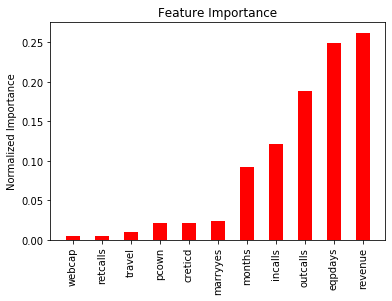

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
width = .5
ax.bar(df['labels'], df['features'],width,color='r')
ax.set_xticks(np.arange(len(clf.feature_importances_)))
ax.set_xticklabels(df['labels'],rotation=90)
plt.title('Feature Importance')
ax.set_ylabel('Normalized Importance')


In [10]:
df[-3:] #top 3 most important features

,features,labels
1,0.188950,outcalls
4,0.248959,eqpdays
0,0.262493,revenue


In [11]:
train_df[train_df.columns[:]].corr()['churndep'][:] #finding correlations of top 3 features

revenue    -0.012230
outcalls   -0.039009
incalls    -0.043556
months      0.022121
eqpdays     0.112723
webcap     -0.064509
marryyes   -0.007321
travel     -0.001158
pcown      -0.002691
creticd    -0.011422
retcalls    0.067860
churndep    1.000000
Name: churndep, dtype: float64

In [12]:
from sklearn import metrics

In [13]:
churndep_train = clf.predict(x_train)
print("Accuracy:",metrics.accuracy_score(y_train, churndep_train))

Accuracy: 0.9998431962868881


In [14]:
churndep_pred = clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test,churndep_pred))

Accuracy: 0.5337431008529855


In [15]:
min_samples_split_values = None
min_samples_leaf_values = None

In [26]:
min_samples_split_values = [25,50,100,200,300,400,500,600,700,800] #set to max of sqrt of total samples
min_samples_split_values

[25, 50, 100, 200, 300, 400, 500, 600, 700, 800]

In [30]:
min_samples_leaf_values = [0.05,0.1,0.15,0.2,0.25,0.4,0.5,0.6,0.7,0.8]
min_samples_leaf_values

[0.05, 0.1, 0.15, 0.2, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8]

In [18]:
import math

In [32]:
# build new classifer, check accuracy on test
best_acc = 0
res = dict()
for i in min_samples_leaf_values:
    res[i] = list()
for i in min_samples_leaf_values:
    for j in min_samples_split_values:
        model = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = j, min_samples_leaf = math.ceil(i*j))
        model = model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        acc = metrics.accuracy_score(y_test,y_pred)
        res[i].append(acc)
        if acc > best_acc:
            best_acc = acc
            best_leaf =i
            best_split = j
print(res)

{0.05: [0.5408931259407928, 0.548670346211741, 0.5637230306071249, 0.5815353738083292, 0.5856748620170598, 0.5916959357752133, 0.5918213748118415, 0.5967134972403412, 0.597215253386854, 0.5969643753135976], 0.1: [0.5352483692925238, 0.5440291018564978, 0.5683642749623683, 0.5775213246362267, 0.5866783743100853, 0.5879327646763672, 0.5899397892624184, 0.590316106372303, 0.5913196186653287, 0.5944555945810336], 0.15: [0.5344957350727546, 0.5501756146512795, 0.564350225790266, 0.5801555444054189, 0.5865529352734571, 0.5820371299548419, 0.5844204716507777, 0.5924485699949824, 0.5926994480682388, 0.5930757651781234], 0.2: [0.5367536377320622, 0.5529352734570998, 0.5693677872553938, 0.5836678374310086, 0.5816608128449573, 0.5846713497240341, 0.5849222277972905, 0.5870546914199699, 0.592824887104867, 0.592824887104867], 0.25: [0.5344957350727546, 0.5560712493728048, 0.564350225790266, 0.5819116909182137, 0.5809081786251882, 0.5879327646763672, 0.5852985449071751, 0.5863020572002007, 0.5911941

Text(0.5, 1.0, 'Accuracy by Decision Tree Parameters')

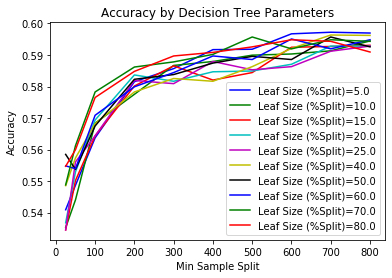

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
# Code here
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(min_samples_split_values,res[min_samples_leaf_values[0]], 'b', label = 'Leaf Size (%Split)={}'.format(min_samples_leaf_values[0]*100))
plt.plot(min_samples_split_values,res[min_samples_leaf_values[1]], 'g', label = 'Leaf Size (%Split)={}'.format(min_samples_leaf_values[1]*100))
plt.plot(min_samples_split_values,res[min_samples_leaf_values[2]], 'r', label = 'Leaf Size (%Split)={}'.format(min_samples_leaf_values[2]*100))
plt.plot(min_samples_split_values,res[min_samples_leaf_values[3]], 'c', label = 'Leaf Size (%Split)={}'.format(min_samples_leaf_values[3]*100))
plt.plot(min_samples_split_values,res[min_samples_leaf_values[4]], 'm', label = 'Leaf Size (%Split)={}'.format(min_samples_leaf_values[4]*100))
plt.plot(min_samples_split_values,res[min_samples_leaf_values[5]], 'y', label = 'Leaf Size (%Split)={}'.format(min_samples_leaf_values[5]*100))
plt.plot(min_samples_split_values,res[min_samples_leaf_values[6]], 'k', label = 'Leaf Size (%Split)={}'.format(min_samples_leaf_values[6]*100))
plt.plot(min_samples_split_values,res[min_samples_leaf_values[7]], 'b', label = 'Leaf Size (%Split)={}'.format(min_samples_leaf_values[7]*100))
plt.plot(min_samples_split_values,res[min_samples_leaf_values[8]], 'g', label = 'Leaf Size (%Split)={}'.format(min_samples_leaf_values[8]*100))
plt.plot(min_samples_split_values,res[min_samples_leaf_values[9]], 'r', label = 'Leaf Size (%Split)={}'.format(min_samples_leaf_values[9]*100))

plt.legend(loc =4)
ax.set_xlabel('Min Sample Split')
ax.set_ylabel('Accuracy')
plt.title('Accuracy by Decision Tree Parameters')

In [34]:
# Code here
#Calculations for best accuracy were completed within the for loop in q#3
print("Best Accuracy:", best_acc)
print("Optimal min_samples_split:",best_split)
print("Optimal min_samples_leaf:",best_leaf)

Best Accuracy: 0.597215253386854
Optimal min_samples_split: 700
Optimal min_samples_leaf: 0.05
